# IMDA call center design 2 sentiment labelling
## code reference: **NMSM Day 1 Part I**
## **In this section, we will take a look at several common sentiment analysis methods, namely ATextBlob, SentiWordNet and VADER.**

## **1. Using TextBlob** - lexicon-based NLTK
 TextBlob is a python library for Natural Language Processing (NLP) that uses Natural Language ToolKit (NLTK) to perform sentiment analysis tasks and supports complex analysis and operations on textual data.

It returns the polarity and subjectivity scores of a sentence (See NMSM Day 1 Part I Slide 16-17). Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [1]:
!pip install -U textblob
!python -m textblob.download_corpora

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [2]:
from textblob import TextBlob

To do any kind of text processing using TextBlob, we need to follow two steps listed below:
*   Convert any string to TextBlob object.  [TextBlobs Are Like Python Strings!](https://textblob.readthedocs.io/en/dev/quickstart.html#textblobs-are-like-python-strings)
*   Call functions of TextBlob to do a specific task

In [3]:
blob_obj = TextBlob('hi this is A B C bank how can I help you')
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=0.0, subjectivity=0.0)

In [5]:
blob_obj = TextBlob("you you actually a little bit breaking up like can can you repeat that one more time I didn't catch you very clearly")
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=0.1475, subjectivity=0.4994444444444444)

In [6]:
blob_obj = TextBlob("because I just scared like sq~ squirting liquid out of my ya because it was really that bad and then I had to I just couldn't")
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=-0.24999999999999992, subjectivity=0.43333333333333335)

In [7]:
# Only polarity score
polarity_score = TextBlob('Your service has never been good').polarity
polarity_score

0.7

## **Using SentiWordNet** - WordNet lexical DB

 SentiWordNet operates on the WordNet database, which is a lexical database composing English words, grouped as synonyms into what is known as synsets. Simply-speaking, WordNet is somewhat similar to a Thesaurus with the ability to understand certain specific contexts. SentiWordNet assigns to each synset of WordNet three sentiment scores: positivity, negativity, objectivity. It is different from both sentiment classification where we view positive and negative sentiments on a continuous scale.

In [8]:
!pip install -U nltk
import nltk
nltk.download('all') # Use this for everything. Then next 2 lines are not required
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root

In [9]:
# Check words similar meaning words and different usage as per language
list(swn.senti_synsets('scared'))

[SentiSynset('frighten.v.01'),
 SentiSynset('daunt.v.01'),
 SentiSynset('scar.v.01'),
 SentiSynset('frightened.s.01')]

Here `hate` can be `Noun` -> **She looked at him with eyes full of hate** \
or `hate` cab be a `Verb` -> **I hate the smell of cigarettes**

In [10]:
from nltk.tag import pos_tag
token = nltk.word_tokenize("because I just scared like sq~ squirting liquid out of my ya because it was really that bad and then I had to I just couldn't")
after_tagging = nltk.pos_tag(token)
after_tagging

[('because', 'IN'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('scared', 'VBD'),
 ('like', 'IN'),
 ('sq~', 'NN'),
 ('squirting', 'VBG'),
 ('liquid', 'PRP'),
 ('out', 'IN'),
 ('of', 'IN'),
 ('my', 'PRP$'),
 ('ya', 'NN'),
 ('because', 'IN'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('really', 'RB'),
 ('that', 'IN'),
 ('bad', 'JJ'),
 ('and', 'CC'),
 ('then', 'RB'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('to', 'TO'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('could', 'MD'),
 ("n't", 'RB')]

**She said its not good to `hate` some one** - This can be classified as 'neg'

In [ ]:
polarity_words= swn.senti_synsets('hate')
words = list(polarity_words)

for word in words:
  print(f'Type: {word},\n\
  Postive score: {word.pos_score()},\n\
  Negative score: {word.neg_score()},\n\
  Objectivity score: {word.obj_score()}', '\n')

Type: <hate.n.01: PosScore=0.125 NegScore=0.375>,
  Postive score: 0.125,
  Negative score: 0.375,
  Objectivity score: 0.5 

Type: <hate.v.01: PosScore=0.0 NegScore=0.75>,
  Postive score: 0.0,
  Negative score: 0.75,
  Objectivity score: 0.25 



The Sentiment of the sentence as a whole is determined by obtaining the difference between the postive and negative scores of the contextual tokens/words that use SentiWordNet to calculate the polarity.

https://nlpforhackers.io/sentiment-analysis-intro/

## ** Using VADER** - lexicon and rule-based

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis method that is specifically attuned to sentiments expressed in social media. By relying on a dictionary that maps lexical features to sentiment scores, VADER produces four sentiment measurements. The initial three, positive ("pos"), neutral ("neu"), and negative ("neg"), address the extent of the content that falls into those classifications. The last measurement, the "compound" score, is somewhat like an overall score, which have been normalized to run between – 1 and 1.

In [11]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


***Make sure you are set to handle UTF-8 encoding in your terminal or IDE***

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [13]:
vader_obj = SentimentIntensityAnalyzer()

In [14]:
vader_obj.polarity_scores("because I just scared like sq~ squirting liquid out of my ya because it was really that bad and then I had to I just couldn't")

{'neg': 0.208, 'neu': 0.715, 'pos': 0.078, 'compound': -0.6344}

[Read about scoring](https://github.com/cjhutto/vaderSentiment#python-demo-and-code-examples)


[How compound score is calculated](https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk)

In [15]:
vader_obj.polarity_scores("you you actually a little bit breaking up like can can you repeat that one more time I didn't catch you very clearly")

{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.6697}

In [16]:
vader_obj.polarity_scores("I see a free airpod okay that's good")

{'neg': 0.0, 'neu': 0.382, 'pos': 0.618, 'compound': 0.7964}

In [17]:
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

In [18]:
for sentence in sentences:
  vader_score = vader_obj.polarity_scores(sentence)
  print(f'{sentence} {"-"*20} {vader_score}')

VADER is smart, handsome, and funny. -------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny! -------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny. -------------------- {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY. -------------------- {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!! -------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!! -------------------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny. -------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good. -------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
At least it isn't a horr

# **Text Pre-Processing and Data Visualization**


##  To Apply IMDA dataset
In this section, we will be using the call center design dataset from IMDA to cross check sentiment labels with 2 approaches
including steps of text pre-processing and data visualization.
To do so, we will use both NLTK and scikit-learn library.

In [19]:
import pandas as pd
import os

In [21]:
sentences_df = pd.read_csv('./sentence_level_script_data_filtered.csv')
sentences_df.head(10)

,Unnamed: 0,file_name,session_id,speaker_id,speaker_type,dialog_type,x_min,x_max,cleaned_text_for_sentiment
0,0,app_0683_0013_phnd_cc-bnk.TextGrid,683,13,agent,bank,0.00,5.35,hi this is A B C bank how can I help you
1,1,app_0683_0013_phnd_cc-bnk.TextGrid,683,13,agent,bank,17.15,23.55,ya our bank do give out ya our bank does give ...
2,2,app_0683_4366_phnd_cc-bnk.TextGrid,683,4366,client,bank,23.28,27.41,ya probably I can give you some information on...
3,3,app_0683_4366_phnd_cc-bnk.TextGrid,683,4366,client,bank,27.41,31.26,first okay I'm actually having a H_D_B resale ...
4,4,app_0683_4366_phnd_cc-bnk.TextGrid,683,4366,client,bank,31.26,38.52,four room flat that I bought back in two thous...
5,5,app_0683_4366_phnd_cc-bnk.TextGrid,683,4366,client,bank,38.52,49.04,so I'm actually looking I I having a the finan...
6,6,app_0683_4366_phnd_cc-bnk.TextGrid,683,4366,client,bank,49.04,59.20,to the bank and hoping to inquire more on your...
7,7,app_0683_4366_phnd_cc-bnk.TextGrid,683,4366,client,bank,59.20,64.36,thirdly is how many years of a loan that the t...
8,8,app_0683_4366_phnd_cc-bnk.TextGrid,683,4366,client,bank,82.25,90.34,you mention fixed rate and the other one the o...
9,9,app_0683_0013_phnd_cc-bnk.TextGrid,683,13,agent,bank,91.62,97.30,okay so for the floating rate right we do foll...


In [23]:
# sentences_df.head(10000).to_csv('./sentence_level_script_data_filtered_10000.csv', index=False)

In [55]:
data = sentences_df[['speaker_type','cleaned_text_for_sentiment']]
data.columns = ['speaker_type', 'text']
data.head()

,speaker_type,text
0,agent,hi this is A B C bank how can I help you
1,agent,ya our bank do give out ya our bank does give ...
2,client,ya probably I can give you some information on...
3,client,first okay I'm actually having a H_D_B resale ...
4,client,four room flat that I bought back in two thous...


### Data Visualization before Text Pre-processing

In [25]:
# Word cloud
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

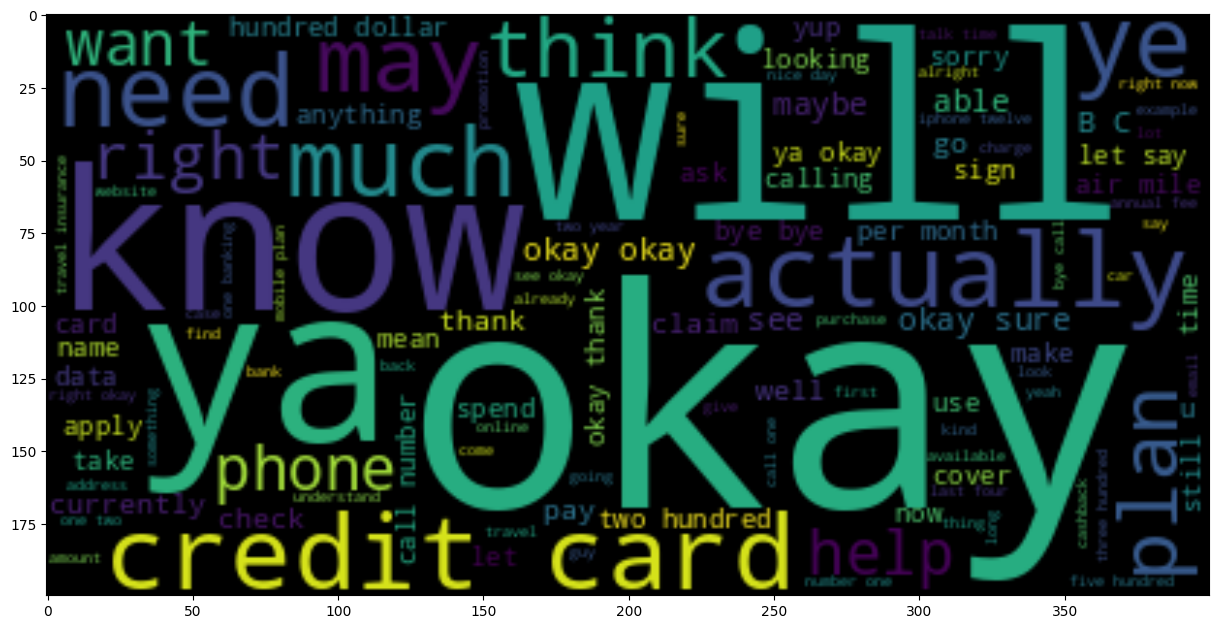

In [56]:
wordcloud_before = WordCloud().generate(' '.join(data['text']))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_before, interpolation='bilinear')

### Text Pre-processing - individual functions

- text all lower case, skipped
- punctuation removal: like ~
- stopword removal
- remove numbers


In [28]:
# Remove Punctuation
import string

PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["text_wo_punct"] = data["text"].apply(lambda text: remove_punctuation(text))

In [29]:
# Remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["text_wo_stop"] = data["text_wo_punct"].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
## Remove numbers or any other no Alphabet
## my_string.isalpha(), my_string.isdigit(), my_string.isalnum()

def remove_digits(text):
    return " ".join([word for word in text.split() if not word.isdigit()])

data["text_wo_digits"] = data["text_wo_stop"].apply(
    lambda text: remove_digits(text))

In [32]:
# Check most frequent words
from collections import Counter

cnt = Counter()

for text in data["text_wo_digits"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(20)

[('I', 4795),
 ('okay', 4434),
 ('like', 2258),
 ('ya', 1317),
 ('one', 1275),
 ('right', 1052),
 ('two', 878),
 ('yes', 870),
 ('know', 867),
 ('plan', 817),
 ('actually', 770),
 ('card', 747),
 ('hundred', 736),
 ('Im', 706),
 ('would', 691),
 ('get', 659),
 ('need', 629),
 ('insurance', 622),
 ('five', 616),
 ('three', 606)]

In [33]:
# Remove most frequent words
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

data["text_wo_stopfreq"] = data["text_wo_digits"].apply(lambda text: remove_freqwords(text))

In [34]:
# Check least frequent words
from collections import Counter

cnt = Counter()

for text in data["text_wo_stopfreq"].values:
    for word in text.split():
        cnt[word] += 1

list(reversed(cnt.most_common(10)))

[('three', 606),
 ('five', 616),
 ('insurance', 622),
 ('need', 629),
 ('get', 659),
 ('would', 691),
 ('Im', 706),
 ('hundred', 736),
 ('card', 747),
 ('actually', 770)]

In [35]:
# Remove rare words
RAREWORDS = set([w for (w, wc) in reversed(cnt.most_common(10))])

def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

data["text_wo_stopfreqrare"] = data["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))


In [36]:
# Stemming (Try using for on sentiment task else the work may not retain its base meaning)
from nltk.stem.porter import PorterStemmer
# from nltk.stem.snowball import SnowballStemmer

stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

data["text_stemmed"] = data["text_wo_stopfreqrare"].apply(lambda text: stem_words(text))


In [37]:
# Lemmatizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

data["text_lemmatized"] = data["text_wo_stopfreqrare"].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [38]:
data_cleaned = data[['text_lemmatized', 'speaker_type']]
data_cleaned.head()

,text_lemmatized,speaker_type
0,hi A B C bank help,agent
1,bank give bank give home loan,agent
2,probably give information side,client
3,first HDB resale flat,client
4,four room flat buy back thousand sixteen,client


## **Main Process**

*   Use any tool introduced above to assign sentiment labels (Pos/Neu/Neg) to each of the reviews
*   Plot the barchart for each sentiment group
*   Show the wordcloud for each sentiment group







### my text pre-processing

In [57]:
def my_process(text):
  # remove digit
  words = [word for word in text.split() if not word.isdigit()]
  # remove common words
  my_stopwords = set(['one', 'two', 'five', 'three', 'hundred','get'])
  words = [word for word in str(text).split() if word not in my_stopwords]
  # lemma
  pos_tagged_text = nltk.pos_tag(words)
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

data['processed_text'] = data['text'].apply(lambda text: my_process(text))

<ipython-input-57-210bdb5ab5fe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_text'] = data['text'].apply(lambda text: my_process(text))


###  assign sentiment labels (Pos/Neu/Neg) via textblob and VADER

In [45]:
data[['speaker_type','processed_text']].head()

,speaker_type,processed_text
0,agent,hi this be A B C bank how can I help you
1,agent,ya our bank do give out ya our bank do give ou...
2,client,ya probably I can give you some information on...
3,client,first okay I'm actually have a H_D_B resale flat
4,client,four room flat that I buy back in thousand six...


In [59]:
global sentiment_tool_VADER
sentiment_tool_VADER = SentimentIntensityAnalyzer()

def sentiment_label_by_VADER(text):
    """assign sentiment labels by VADER"""
    score_dict = sentiment_tool_VADER.polarity_scores(text)
    if score_dict['compound'] >= 0.1:
        return 'positive'
    elif score_dict['compound'] <= -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply to the DataFrame
sentiment_label_VADER = data['processed_text'].apply(lambda text: sentiment_label_by_VADER(text))

In [60]:
def sentiment_label_by_TextBlob(text):
    analysis = TextBlob(text)
    # Classify polarity: positive (polarity > 0), negative (polarity < 0), or neutral (polarity == 0)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply to the DataFrame
sentiment_label_TextBlob = data['processed_text'].apply(lambda text: sentiment_label_by_TextBlob(text))

In [67]:
sentences_df['sentiment_label_VADER'] = sentiment_label_VADER
sentences_df['sentiment_label_TextBlob'] = sentiment_label_TextBlob
sentences_df['processed_text'] = data['processed_text']
# sentences_df.shape
sentences_df.to_csv('./sentence_level_script_data_w_label.csv')

### Plot the barchart for each sentiment group

<Axes: xlabel='processed_text'>

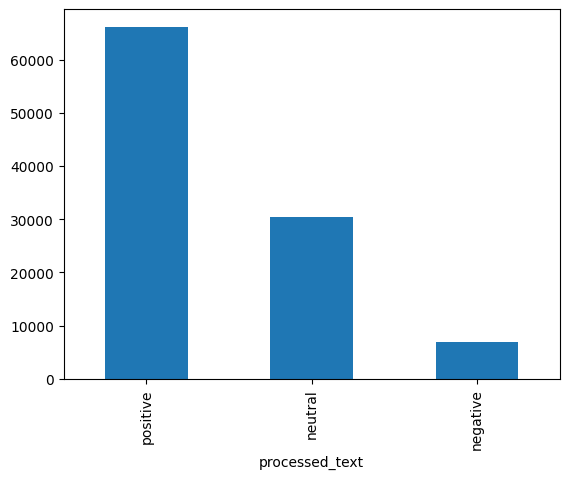

In [61]:
# Plot the barchart for each sentiment group

group_counts = sentiment_label_VADER.value_counts()
group_counts.plot.bar(x="sentiment group", y="count")

<Axes: xlabel='processed_text'>

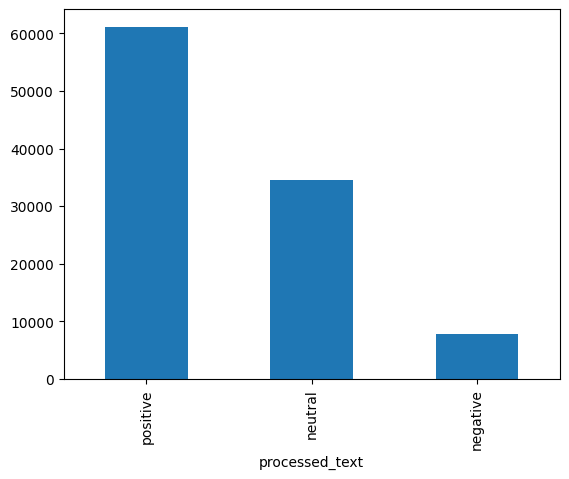

In [62]:
group_counts = sentiment_label_TextBlob.value_counts()
group_counts.plot.bar(x="sentiment group", y="count")

### Show the wordcloud for each sentiment group

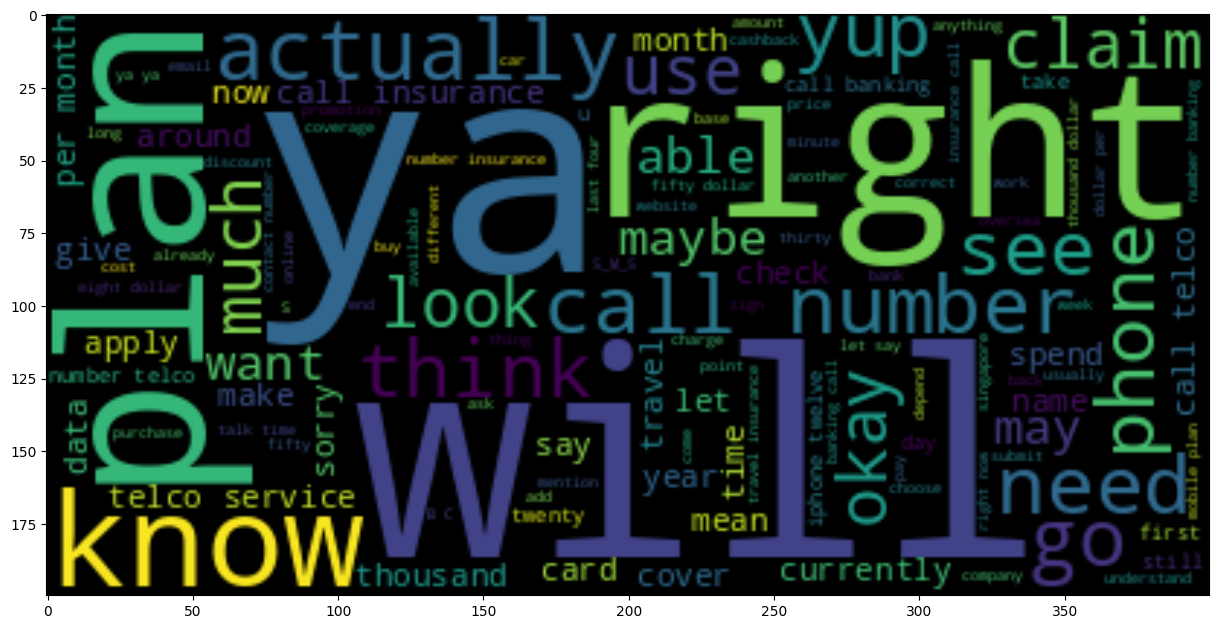

In [63]:
# Show the wordcloud for each sentiment group
neu_group = data[['speaker_type','processed_text']][sentiment_label_VADER =='neutral']
pos_group = data[['speaker_type','processed_text']][sentiment_label_VADER =='positive']
neg_group = data[['speaker_type','processed_text']][sentiment_label_VADER =='negative']

wordcloud_neu = WordCloud().generate(' '.join(neu_group['processed_text']))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_neu, interpolation='bilinear')

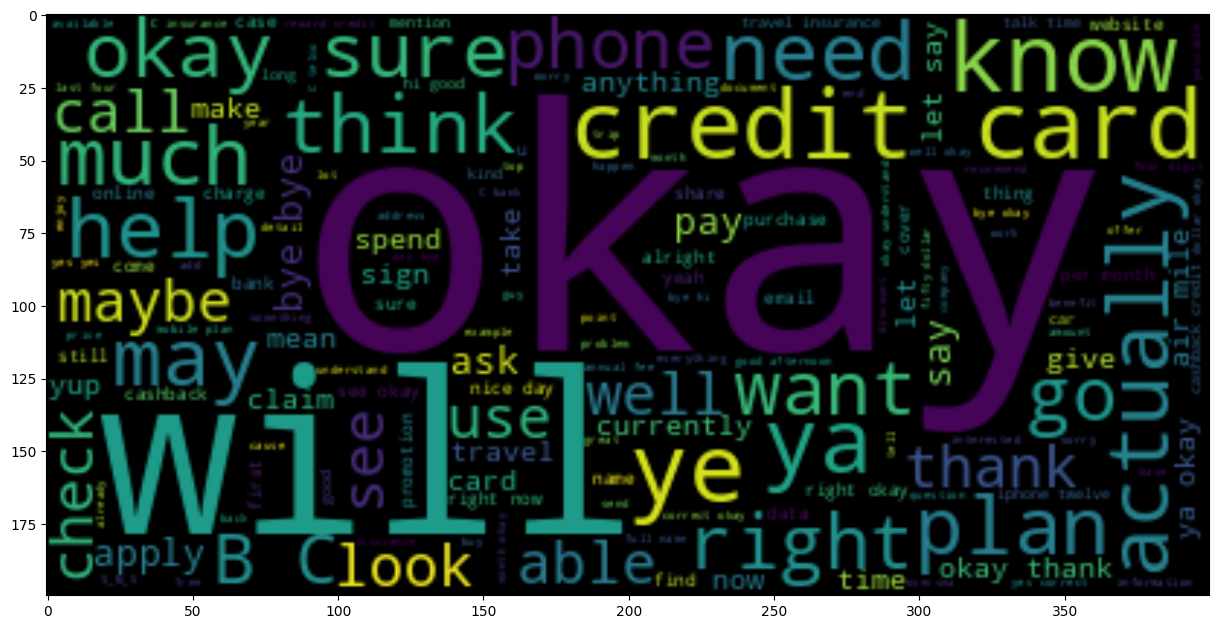

In [64]:
wordcloud_pos = WordCloud().generate(' '.join(pos_group['processed_text']))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_pos, interpolation='bilinear')

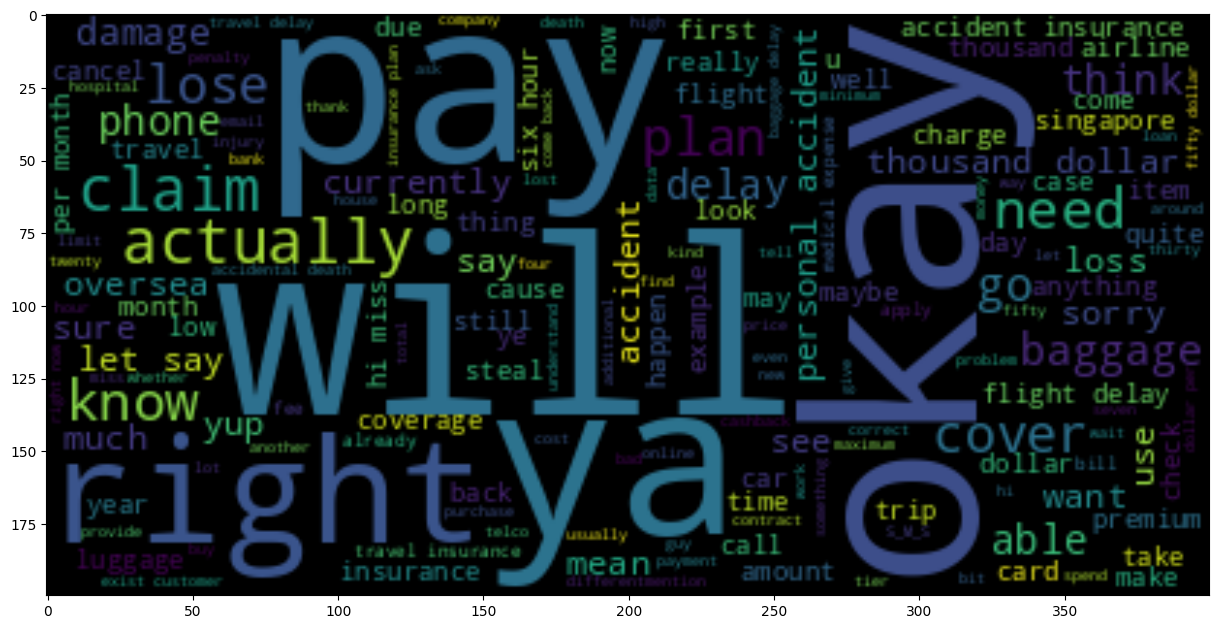

In [65]:
wordcloud_neg = WordCloud().generate(' '.join(neg_group['processed_text']))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_neg, interpolation='bilinear')

# **Other Useful Resources**
- [Allen NLP Demo](https://demo.allennlp.org/sentiment-analysis)
- [HuggingFace](https://api-inference.huggingface.co/docs/)
- [HuggingFace Colab Example Notebooks](https://github.com/huggingface/transformers/tree/master/notebooks)
- [If you want to read about transformers](https://huggingface.co/transformers/)
- [Pattern NLP link 1](https://stackabuse.com/python-for-nlp-introduction-to-the-pattern-library/)
- [Pattern NLP link 2](https://analyticsindiamag.com/hands-on-guide-to-pattern-a-python-tool-for-effective-text-processing-and-data-mining/)
- [Twitter Emotion Recognition](https://github.com/nikicc/twitter-emotion-recognition)
